

## 项目 : 预测波士顿房价


欢迎来到 DSVC 《机器学习》研讨班第二周的项目！在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能来让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以**编程练习**开始的标题表示接下来的内容中有需要你必须实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以**TODO**标出。请仔细阅读所有的提示！

除了实现代码外，你还**必须**回答一些与项目和实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。你的项目将会根据你对问题的回答和撰写代码所实现的功能来进行评分。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

---
## 第一步. 导入数据
在这个项目中，你将利用马萨诸塞州波士顿郊区的房屋信息数据训练和测试一个模型，并对模型的性能和预测能力进行测试。通过该数据训练后的好的模型可以被用来对房屋做特定预测---尤其是对房屋的价值。对于房地产经纪等人的日常工作来说，这样的预测模型被证明非常有价值。

此项目的数据集来自[UCI机器学习知识库(数据集已下线)](https://archive.ics.uci.edu/ml/datasets.html)。波士顿房屋这些数据于1978年开始统计，共506个数据点，涵盖了麻省波士顿不同郊区房屋14种特征的信息。本项目对原始数据集做了以下处理：
- 有16个`'MEDV'` 值为50.0的数据点被移除。 这很可能是由于这些数据点包含**遗失**或**看不到的值**。
- 有1个数据点的 `'RM'` 值为8.78. 这是一个异常值，已经被移除。
- 对于本项目，房屋的`'RM'`， `'LSTAT'`，`'PTRATIO'`以及`'MEDV'`特征是必要的，其余不相关特征已经被移除。
- `'MEDV'`特征的值已经过必要的数学转换，可以反映35年来市场的通货膨胀效应。

运行下面区域的代码以载入波士顿房屋数据集，以及一些此项目所需的Python库。如果成功返回数据集的大小，表示数据集已载入成功。

In [0]:
# 载入此项目所需要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 让可视化的结果在notebook中显示
%matplotlib inline

In [5]:
# 载入波士顿房屋的数据集
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# 完成
print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


__下面三张图的横坐标分别是：住宅平均房间数量、区域中被认为是低收入阶层的比率和镇上学生与教师数量比例，纵坐标是房屋的中值价格__

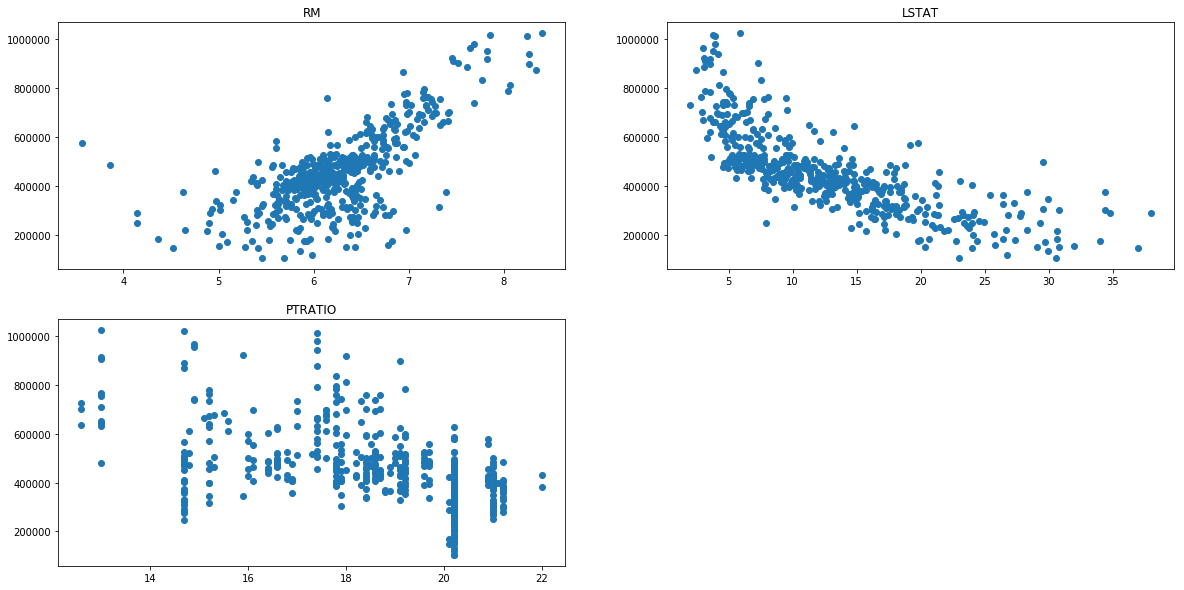

In [6]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.title('RM')
plt.scatter(features.get_values()[:, 0], prices.get_values())
plt.subplot(2, 2, 2)
plt.title('LSTAT')
plt.scatter(features.get_values()[:, 1], prices.get_values())
plt.subplot(2, 2, 3)
plt.title('PTRATIO')
plt.scatter(features.get_values()[:, 2], prices.get_values())

---
## 第二步. 分析数据
在项目的第一个部分，你会对波士顿房地产数据进行初步的观察并给出你的分析。通过对数据的探索来熟悉数据可以让你更好地理解和解释你的结果。

由于这个项目的最终目标是建立一个预测房屋价值的模型，我们需要将数据集分为**特征(features)**和**目标变量(target variable)**。
- **特征** `'RM'`， `'LSTAT'`，和 `'PTRATIO'`，给我们提供了每个数据点的数量相关的信息。
- **目标变量**：` 'MEDV'`，是我们希望预测的变量。

他们分别被存在`features`和`prices`两个变量名中。

### 编程练习 1：基础统计运算
你的第一个编程练习是计算有关波士顿房价的描述统计数据。我们已为你导入了` numpy `，你需要使用这个库来执行必要的计算。这些统计数据对于分析模型的预测结果非常重要的。
在下面的代码中，你要做的是：
- 计算`prices`中的`'MEDV'`的最小值、最大值、均值、中值和标准差；
- 将运算结果储存在相应的变量中。

In [7]:
# TODO: Minimum price of the data
#目标：计算价值的最小值
minimum_price = min(prices)

# TODO: Maximum price of the data
#目标：计算价值的最大值
maximum_price = max(prices)

# TODO: Mean price of the data
#目标：计算价值的平均值
mean_price = np.mean(prices)

# TODO: Median price of the data
#目标：计算价值的中值
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
#目标：计算价值的标准差
std_price = np.std(prices)

# Show the calculated statistics
#目标：输出计算的结果
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))


Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### 问题 1 - 特征观察

如前文所述，本项目中我们关注的是其中三个值:`'RM'`、`'LSTAT'` 和`'PTRATIO'`，对每一个数据点:
- `'RM'` 是该地区中每个房屋的平均房间数量；
- `'LSTAT'` 是指该地区有多少百分比的房东属于是低收入阶层（有工作但收入微薄）；
- `'PTRATIO'` 是该地区的中学和小学里，学生和老师的数目比（`学生/老师`）。

_凭直觉，上述三个特征中对每一个来说，你认为增大该特征的数值，`'MEDV'`的值会是**增大**还是**减小**呢？每一个答案都需要你给出理由。_

**提示：**你预期一个`'RM'` 值是6的房屋跟`'RM'` 值是7的房屋相比，价值更高还是更低呢？

### 问题 1 - 回答：

### 编程练习 2: 数据分割与重排
接下来，你需要把波士顿房屋数据集分成训练和测试两个子集。通常在这个过程中，数据也会被重排列，以消除数据集中由于顺序而产生的偏差。
在下面的代码中，你需要

将`features`和`prices`的数据都分成用于训练的数据子集和用于测试的数据子集。
  - 分割比例为：80%的数据用于训练，20%用于测试；
  - 选定一个数值以设定 `random_seed` ，这会确保结果的一致性；
  - 提示：打乱训练集和测试集的数据时，只要创建一个 list，然后用这个 list 分别应用于 X，y 生成训练集和测试集。
 ```
 test = np.array([1, 3, 5, 7, 9, 11])
 """ test[[0,1,2]] = [1, 3, 5]
 """ test[[1,3,5]] = [3, 7, 11]
 ```
  
  可能需要用到的函数
  - (numpy.random.seed)[https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.seed.html]
  - (numpy.random.shuffle)[https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.shuffle.html]

In [0]:

LEN, seed = 489,599
def generate_train_and_test(X, y):
    """打乱并分割数据为训练集和测试集"""
    
    np.random.seed(seed)#设置随机种子
    data_list=[i for i in range(LEN)]
#     data_list=range(LEN)
    np.random.shuffle(data_list)
    
    train_size=round(LEN*0.8)  #取整
    
    train_indexs=data_list[:train_size]
    
    test_indexs=data_list[train_size:]
    
    return X[train_indexs], X[test_indexs],y[train_indexs],y[test_indexs]
X_train, X_test, y_train, y_test = generate_train_and_test(features.values, prices.values)



### 问题 2 - 训练及测试
*将数据集按一定比例分为训练用的数据集和测试用的数据集对学习算法有什么好处？*

*如果果用模型已经见过的数据，例如部分训练集数据进行测试，又有什么坏处？*

**提示：** 如果没有数据来对模型进行测试，会出现什么问题？

### 问题 2 - 回答:
划分训练集和测试集的好处在于，我们可以近似的求出模型的泛化误差，帮助我们评估模型的泛化能力。
我们总是希望得到泛化误差比较小的模型，但是泛化误差在训练中是无法得到的，因为永远也不知道新的数据到底是个什么样子。但是我们可以对泛化误差进行评估，评估的方法就是把数据集分为训练集和测试集两部分，常见的办法有留出法，交叉验证法（包含留一法）和自助法（适合小规模的数据），他们的原理就是从数据集中拿出一部部分数据，这部分数据不参加训练，用来充当新的数据，进而评估在模型在当前数据集中的表现，通过测试误差近似的代表其泛化误差，但是要注意要在分割的时候保持数据分布的一致性。
违背黄金法则就意味着最终会得到不准确的测试误差，我们对模型的泛化能力评估在很大程度上失去了意义。
这里有一条黄金法则：测试集中的样本永远都不可以参加训练，因为一旦测试集中的样本参加了训练，就等于污染了训练集，训练中已经习得了新数据的特性，甚至在过拟合的情况下完全记住了这些样本，之后再遇到这些样本，结果可想而知，测试已经失去了测试的意义；这就好比我们要检验一个学生的真实能力，但是在试卷中除了了很多学生训练过的原题，但是同样的道理换一个题型，学生还会不会解我们依旧不知道，学生的能力到底有多强，也就很难判断了。



---
## 第三步. 模型衡量标准

### 编程练习3：定义衡量标准
如果不能对模型的训练和测试的表现进行量化地评估，我们就很难衡量模型的好坏。通常我们会定义一些衡量标准，这些标准可以通过对某些误差或者拟合程度的计算来得到。在这个项目中，你将通过运算[*决定系数*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination) R<sup>2</sup> 来量化模型的表现。模型的决定系数是回归分析中十分常用的统计信息，经常被当作衡量模型预测能力好坏的标准。

R<sup>2</sup>的数值范围从0至1，表示**目标变量**的预测值和实际值之间的相关程度平方的百分比。一个模型的R<sup>2</sup> 值为0还不如直接用**平均值**来预测效果好；而一个R<sup>2</sup> 值为1的模型则可以对目标变量进行完美的预测。从0至1之间的数值，则表示该模型中目标变量中有百分之多少能够用**特征**来解释。_模型也可能出现负值的R<sup>2</sup>，这种情况下模型所做预测有时会比直接计算目标变量的平均值差很多。_

在下方代码的 `performance_metric` 函数中，你要实现：
- 计算 `y_true` 和 `y_predict`的R<sup>2</sup>值，作为对其表现的评判，可参考[`r2_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)。
- 将他们的表现评分储存到`score`变量中。


In [0]:
# TODO 3

# 提示： 导入r2_score
def performance_metric(y_true, y_predict):
    """计算并返回预测值相比于预测值的分数"""
    y_mean = float(sum(y_true))/len(y_true)
    temp01 = [(each-y_mean)*(each-y_mean) for each in y_true]
    sstot = sum(temp01)

    temp02 = [(a-b)*(a-b) for a,b in zip(y_true, y_predict)]
    ssres = sum(temp02)

    score = 1 - float(ssres)/sstot

    return score


### 问题 3 - 拟合程度

假设一个数据集有五个数据且一个模型做出下列目标变量的预测：

| 真实数值 | 预测数值 |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*你觉得这个模型已成功地描述了目标变量的变化吗？如果成功，请解释为什么，如果没有，也请给出原因。*  

**提示**：运行下方的代码，使用`performance_metric`函数来计算模型的决定系数。

In [105]:
# 计算这个模型的预测结果的决定系数
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


### 问题 3 - 回答:

## 第四步. 模型训练
### 编程练习 4：训练回归模型
在这个练习中，你将需要将所学到的内容整合，使用 **gradient descent 算法**训练一个线性回归模型。你可以尝试使用自己构建的多项式特征和 L1、L2 Loss，进行实验后，讨论他们是否对你的模型有效，并通过前面定义的 `performance_metric` 量化他们的提升效果。

在这里，你不能使用现成 package，不能使用额外 data。


In [0]:
class LR():
    def __init__(self,num_iters=1000, learning_rate=0.01):
        self.num_iters = num_iters
        self.learning_rate = learning_rate
    
    
    def fit(self,Xn,yn):
      #进行森度拷贝
        
        X=np.copy(Xn)
        y=np.copy(yn)
        
        m_samples = X.shape[0]
        n_features=X.shape[1]
        
        limit=np.sqrt(1/n_features)
        
        #0.1
        self.w=np.random.uniform(-limit,limit,(n_features+1,1))
#         self.w = np.zeros((X.shape[1] + 1, 1))
        
        #进行0 1 标准化
         # normalise the X
            
        self.X_mean = np.mean(X, axis=0)
        self.X_std = np.std(X, axis=0)
        X -= self.X_mean
#         self.X_std[self.X_std == 0] = 1
        X /= self.X_std
        
        
        self.y_mean = y.mean(axis=0)
        y -= self.y_mean

        X = np.hstack((np.ones(X.shape[0])[np.newaxis].T, X))
        
        #计算梯度
        self.loss=[]
        for i in range(self.num_iters):
            
            loss=(1. / (2. * m_samples)) * (np.sum((np.dot(X, self.w)-y) ** 2.)) 
            self.loss.append(loss)
#             print(loss[0])
            self.w = self.w-(self.learning_rate /m_samples) * (np.dot(X.T, (X.dot(self.w)-y[:, np.newaxis]))) 
    
        
    def predict(self, Xn):
        X=np.copy(Xn)
        X -= self.X_mean
        X /= self.X_std
        X = np.hstack((np.ones(X.shape[0])[np.newaxis].T, X))

        return X.dot(self.w) + self.y_mean


In [0]:
# 实现 Lasso
class Lasso():
    def __init__(self,num_iters=1000, learning_rate=0.01, beta=0.1):
        self.num_iters = num_iters
        self.learning_rate = learning_rate
        self.beta = beta
    
    def fit(self,Xn,yn):
        X=np.copy(Xn)
        y=np.copy(yn)
        
        m_samples = X.shape[0]
        n_features=X.shape[1]
        limit=np.sqrt(1/n_features)  
        self.w=np.random.uniform(-limit,limit,(n_features+1,1))
#         self.w = np.zeros((X.shape[1] + 1, 1))
        
        #进行0 1 标准化
         # normalise the X
        self.X_mean = np.mean(X, axis=0)
        self.X_std = np.std(X, axis=0)
        X -= self.X_mean
#         self.X_std[self.X_std == 0] = 1
        X /= self.X_std
        
        
        self.y_mean = y.mean(axis=0)
        y -= self.y_mean

        X = np.hstack((np.ones(X.shape[0])[np.newaxis].T, X))
        
        #计算梯度
        self.loss=[]
        for i in range(self.num_iters):
            
            loss=(1. / (2. * m_samples)) * (np.sum((np.dot(X, self.w)-y) ** 2.) + self.beta * np.sum(np.fabs(self.w)))
            self.loss.append(loss)
#             print(loss[0])
            self.w = self.w-(self.learning_rate /m_samples) * (np.dot(X.T, (X.dot(self.w)-y[:, np.newaxis])) + self.beta *  np.sign(self.w))
    
        
    def predict(self, Xn):
        X=np.copy(Xn)
        X -= self.X_mean
        X /= self.X_std
        X = np.hstack((np.ones(X.shape[0])[np.newaxis].T, X))

        return X.dot(self.w) + self.y_mean

In [0]:
# 实现Ridge()
class Ridge():
    def __init__(self,num_iters=1000, learning_rate=0.01, beta=0.1):
        self.num_iters = num_iters
        self.learning_rate = learning_rate
        self.beta = beta
    
    def fit(self,Xn,yn):
         #进行深度拷贝
        X=np.copy(Xn)
        y=np.copy(yn)
        m_samples = X.shape[0]
        n_features=X.shape[1]
        limit=np.sqrt(1/n_features)  
        self.w=np.random.uniform(-limit,limit,(n_features+1,1))
#         self.w = np.zeros((X.shape[1] + 1, 1))
        

    
        #进行0 1 标准化
         # normalise the X 
        self.X_mean = np.mean(X, axis=0)
        self.X_std = np.std(X, axis=0)
        X -= self.X_mean
        X /= self.X_std
        
        
        self.y_mean = y.mean(axis=0)
        y -= self.y_mean

        X = np.hstack((np.ones(X.shape[0])[np.newaxis].T, X))
        
        #计算梯度
        self.loss=[]
        for i in range(self.num_iters):
            
            loss=(1. / (2. * m_samples)) * (np.sum((np.dot(X, self.w)-y) ** 2.) + self.beta * np.dot(self.w.T, self.w))
            self.loss.append(loss[0])
            
            self.w = self.w-(self.learning_rate /m_samples) * (np.dot(X.T, (X.dot(self.w)-y[:, np.newaxis])) + self.beta * self.w)
    
        
    def predict(self, Xn):
        X=np.copy(Xn)
        X=X-self.X_mean
        X=X/self.X_std
#         X -= self.X_mean
#         X /= self.X_std
        X = np.hstack((np.ones(X.shape[0])[np.newaxis].T, X))

        return X.dot(self.w) + self.y_mean
    
    
#     def get_params(self, deep = False):
#         params={'learning_rate':self.learning_rate,'num_iters':self.num_iters,'beta':self.beta}
#         return params
    def get_params(self):
        params={'learning_rate':self.learning_rate,'num_iters':self.num_iters,'beta':self.beta}
        return params
    
 
        

In [0]:
LR=Ridge()
LR.fit(X_train,y_train)

### 问题 4 - 回归模型的优化
在最基础的回归模型上，你使用了什么办法来提升模型的效果，最后模型的性能是否得到了提升？如果提升了，请说出提升性能的原理，如果没有，请探究没有生效的原因。

### 问题 4 - 回答：
1.对模型进行加入正则项
2.调整学习率以及迭代次数和超参数

## 第六步. 做出预测
当我们用数据训练出一个模型，它现在就可用于对新的数据进行预测。在决策树回归函数中，模型已经学会对新输入的数据*提问*，并返回对**目标变量**的预测值。你可以用这个预测来获取数据未知目标变量的信息，这些数据必须是不包含在训练数据之内的。

### 问题 5 - 预测销售价格
想像你是一个在波士顿地区的房屋经纪人，并期待使用此模型以帮助你的客户评估他们想出售的房屋。你已经从你的三个客户收集到以下的资讯:

| 特征 | 客戶 1 | 客戶 2 | 客戶 3 |
| :---: | :---: | :---: | :---: |
| 房屋内房间总数 | 5 间房间 | 4 间房间 | 8 间房间 |
| 社区贫困指数（％被认为是贫困阶层） | 17% | 32% | 3% |
| 邻近学校的学生-老师比例 | 15：1 | 22：1 | 12：1 |

*你会建议每位客户的房屋销售的价格为多少？从房屋特征的数值判断，这样的价格合理吗？为什么？* 

**提示：**用你在**分析数据**部分计算出来的统计信息来帮助你证明你的答案。

运行下列的代码区域，使用你的模型来为每位客户的房屋价值做出预测。

In [19]:
# 生成三个客户的数据
client_data = [[5, 17, 15], # 客户 1
               [4, 32, 22], # 客户 2
               [8, 3, 12]]  # 客户 3

# 进行预测
predicted_price =LR.predict(client_data)

for i, price in enumerate(predicted_price):
    price=price[0]
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $370,810.61
Predicted selling price for Client 2's home: $410.18
Predicted selling price for Client 3's home: $823,442.20


### 问题 5 - 回答：

### 编程练习 5
你刚刚预测了三个客户的房子的售价。在这个练习中，你将用你的最优模型在整个测试数据上进行预测, 并计算相对于目标变量的决定系数 R<sup>2</sup>的值**。

In [20]:
#TODO 5

# 提示：你可能需要用到 X_test, y_test, performance_metric
# 提示：你需要使用编程练习 4 中得到参数数值进行预测
# 提示：你可能需要参考问题3的代码来计算R^2的值

y_predict=LR.predict(X_test)

r2=performance_metric(y_test,y_predict)

print ("Optimal model has R^2 score {:,.2f} on test data".format(r2))

Optimal model has R^2 score 0.83 on test data


In [113]:
"""寻找最佳的seed数"""
# data = pd.read_csv('housing.csv')
# prices = data['MEDV']
# features = data.drop('MEDV', axis = 1)
# def generate_train_and_test(X, y,seed):
#     """打乱并分割数据为训练集和测试集"""
    
#     np.random.seed(seed)#设置随机种子
#     data_list=[i for i in range(LEN)]
# #     data_list=range(LEN)
#     np.random.shuffle(data_list)
    
#     train_size=round(LEN*0.8)  #取整
    
#     train_indexs=data_list[:train_size]
    
#     test_indexs=data_list[train_size:]
    
#     return X[train_indexs], X[test_indexs],y[train_indexs],y[test_indexs]

# BestR2=r2=tempseed=0
# for seed in range(1000):
#     X_train, X_test, y_train, y_test = generate_train_and_test(features.values, prices.values,seed)
#     y_predict=LR.predict(X_test)

#     R2=performance_metric(y_test,y_predict)
#     if R2>BestR2:
#         BestR2=R2
#         tempseed=seed

# print(tempseed)

599


通过使用网格搜索来寻找最优参数：


In [0]:
def GridSearch(learning_rate,beta):
  
        num_iters=[1000]
        best_r2=R2=0
        best_model=None
        
        for bs in  num_iters :
            for lr in learning_rate:
                for bt in beta:
                    
                    LR=Ridge(bs,lr,bt)   
            
                    LR.fit(X_train,y_train)
                    
                    y_predict=LR.predict(X_test)
                  
                    R2 = performance_metric(y_test,y_predict)
                    print(R2)
                    if R2 > best_r2:
                        best_r2=R2
                        best_model=LR
                        
        print("best_r2:",best_r2)
        print("最佳的模型参数：",best_model.get_params())

In [29]:

learning_rate=[0.001,0.002,0.004,0.008,0.01,0.2,0.04,0.08]

beta=[0.01,0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.20]
GridSearch(learning_rate,beta)


0.7943357924636932
0.7943335663201742
0.7943270483717914
0.7943213409510552
0.7943157341081033
0.7943096797860988
0.7943038115740608
0.7942976058355822
0.79429223241046
0.7942860741408215
0.7942797372552273
0.8323844097843567
0.8323819189007831
0.8323770435977655
0.8323720203777185
0.8323671792825034
0.8323622212197681
0.8323572541907993
0.8323523158777959
0.8323475103304017
0.8323423774773656
0.8323375923451256
0.8345575155365311
0.8345553834665058
0.8345511746661038
0.8345468922100386
0.8345427049953438
0.8345384360289854
0.8345341875878602
0.8345300304052758
0.8345257047428241
0.8345215209169088
0.8345172427661988
0.8330465956056384
0.8330447604660306
0.8330410487014063
0.8330373510466107
0.8330336331480814
0.8330299189719163
0.8330262168821069
0.8330225097676214
0.8330188036156052
0.8330150830312038
0.8330113735421129
0.8328363702502907
0.8328345744269385
0.8328309793167682
0.8328273798445893
0.8328237890294222
0.8328201885756584
0.8328165889309352
0.8328129945035236
0.832809393043

### 问题6 - 分析决定系数

你刚刚计算了最优模型在测试集上的决定系数，你会如何评价这个结果？（你也可以尝试使用你的模型对问题 5 中三个客户的房屋价值进行预测，并与你之前的预测值进行对比）

### 问题6 - 回答
对于回归问题来说，我们希望得到一个精确的数值，而0.832得R^2分数似乎远远不够，我觉得这个模型预测的结果还不足以让人信服，模型还不足以让人能够放心的使用。